We wrote a scrapper to fetch all coins from coinmarketcap and extract them into separate csv files

Now we are going to use them!

In [8]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

bitcoin = pd.read_csv('../data/november/bitcoin.csv')
ethereum = pd.read_csv('../data/november/ethereum.csv')
litecoin = pd.read_csv('../data/november/litecoin.csv')

# Defining figure dimension for future plots
plt.rcParams['figure.figsize'] = (20, 6)

Converting string do datetime and creating a "weekday" column

In [9]:
bitcoin['Date'] = pd.to_datetime(bitcoin['Date'], format='%Y-%m-%d %H:%M:%S +0000 UTC', utc=True)
bitcoin['Weekday'] = ((pd.DatetimeIndex(bitcoin['Date']).dayofweek) // 5 == 0).astype(bool)

ethereum['Date'] = pd.to_datetime(ethereum['Date'], format='%Y-%m-%d %H:%M:%S +0000 UTC', utc=True)
ethereum['Weekday'] = ((pd.DatetimeIndex(ethereum['Date']).dayofweek) // 5 == 0).astype(bool)

litecoin['Date'] = pd.to_datetime(litecoin['Date'], format='%Y-%m-%d %H:%M:%S +0000 UTC', utc=True)
litecoin['Weekday'] = ((pd.DatetimeIndex(litecoin['Date']).dayofweek) // 5 == 0).astype(bool)



Printing the head

In [10]:
bitcoin.head()

,Date,Open,High,Low,Close,Volume,MarketCap,Weekday
0,2018-11-05 00:00:00+00:00,6363.6,6480.6,6363.6,6419.7,4174800000,111456211022,True
1,2018-11-04 00:00:00+00:00,6365.5,6388.6,6294.6,6376.1,4390020000,110689215104,False
2,2018-11-03 00:00:00+00:00,6387.2,6400.1,6342.4,6361.3,3658640000,110421212888,False
3,2018-11-02 00:00:00+00:00,6378.9,6396.9,6327.4,6388.4,4234870000,110600481395,True
4,2018-11-01 00:00:00+00:00,6318.1,6547.1,6311.8,6377.8,3789400000,110683820788,True


We can divide the datasets between weekday and weekends and compare median volumes

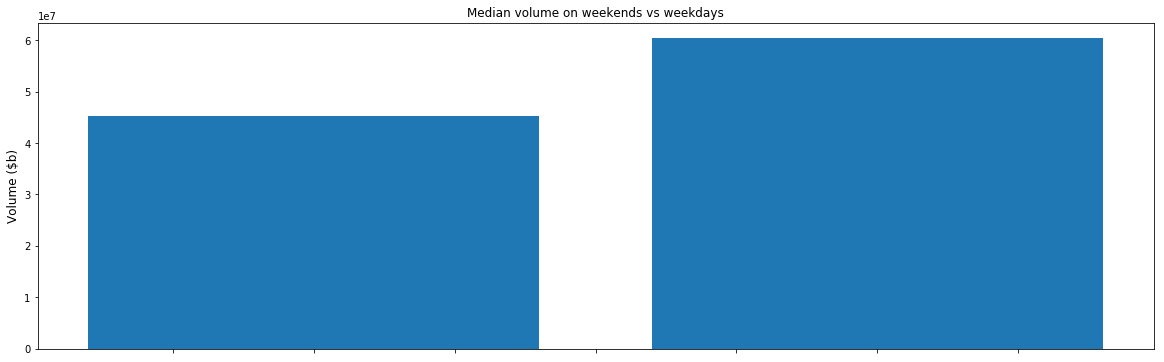

In [11]:
bitcoin_weekend = bitcoin[bitcoin['Weekday'] == False]
bitcoin_weekday = bitcoin[bitcoin['Weekday'] == True]

median_weekend = np.median(bitcoin_weekend['Volume'])
median_weekday = np.median(bitcoin_weekday['Volume'])

fig, ax1 = plt.subplots(1,1)

ax1.set_xticklabels('')
ax1.set_ylabel('Volume ($b)', fontsize=12)
ax1.set_title('Median volume on weekends vs weekdays')

plt.bar([1, 2], [median_weekend, median_weekday])
plt.show()

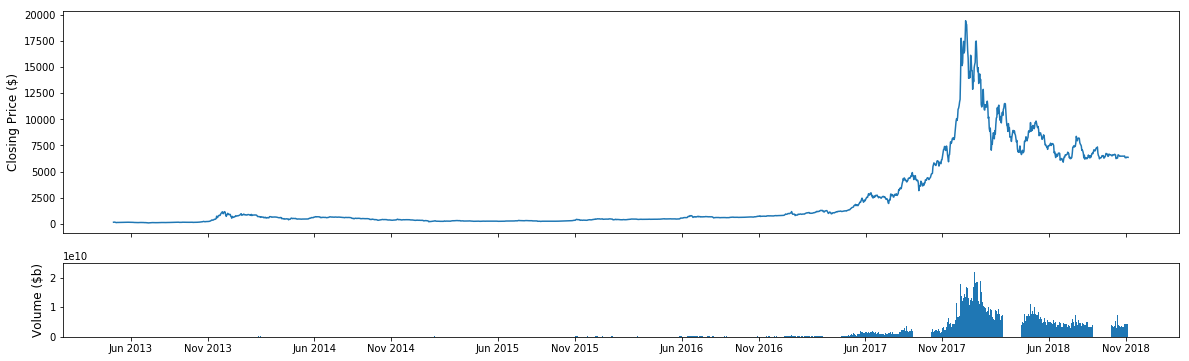

In [12]:
fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[3, 1]})

ax1.set_ylabel('Closing Price ($)', fontsize=12)
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [6,11]])
ax1.set_xticklabels('')

ax2.set_ylabel('Volume ($b)', fontsize=12)
ax2.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [6,11]])
ax2.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [6,11]])

ax1.plot(bitcoin['Date'].astype(datetime.datetime),bitcoin['Open'])
ax2.bar(bitcoin['Date'].astype(datetime.datetime).values, bitcoin['Volume'].values)

plt.show()

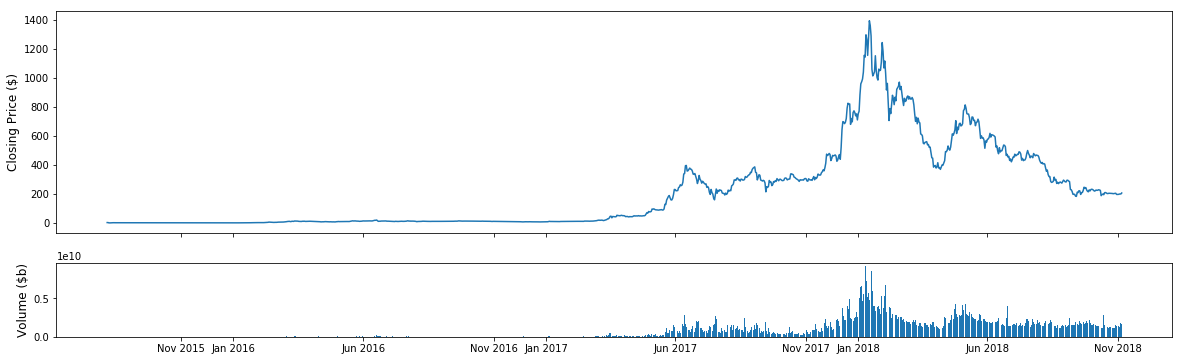

In [13]:
fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[3, 1]})

ax1.set_ylabel('Closing Price ($)', fontsize=12)
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,6,11]])
ax1.set_xticklabels('')

ax2.set_ylabel('Volume ($b)', fontsize=12)
ax2.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,6,11]])
ax2.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,6,11]])

ax1.plot(ethereum['Date'].astype(datetime.datetime),ethereum['Open'])
ax2.bar(ethereum['Date'].astype(datetime.datetime).values, ethereum['Volume'].values)

plt.show()

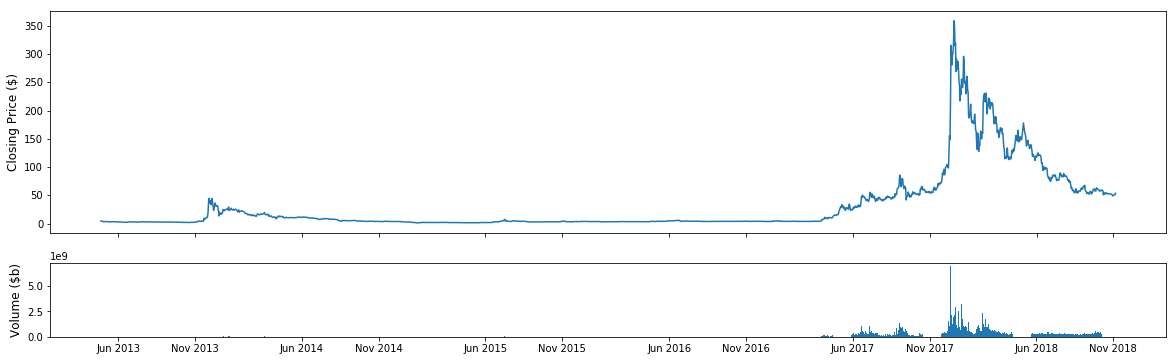

In [14]:
fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[3, 1]})

ax1.set_ylabel('Closing Price ($)', fontsize=12)
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [6,11]])
ax1.set_xticklabels('')

ax2.set_ylabel('Volume ($b)', fontsize=12)
ax2.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [6,11]])
ax2.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [6,11]])

ax1.plot(litecoin['Date'].astype(datetime.datetime),litecoin['Open'])
ax2.bar(litecoin['Date'].astype(datetime.datetime).values, litecoin['Volume'].values)

plt.show()

In [15]:
kwargs = {
    'Gap': lambda x: 2*(x['High']-x['Close'])/(x['High']-x['Low'])-1, 
    'Volatility': lambda x: (x['High']-x['Low'])/(x['Open'])
}

bitcoin = bitcoin[bitcoin['Date']>='2014-01-01']
bitcoin = bitcoin.assign(**kwargs)
bitcoin = bitcoin.sort_values(by='Date', ascending=True)

model_data = bitcoin[['Date']+['Close']+['Volume']+['Gap']+['Volatility']]
model_data.head()

,Date,Close,Volume,Gap,Volatility
1769,2014-01-01 00:00:00+00:00,771.4,22489400,-0.607843,0.027020
1768,2014-01-02 00:00:00+00:00,802.4,38489500,-0.325800,0.068658
1767,2014-01-03 00:00:00+00:00,818.7,37810100,-0.315556,0.056047
1766,2014-01-04 00:00:00+00:00,859.5,38005000,-1.000000,0.070205
1765,2014-01-05 00:00:00+00:00,933.5,72898496,-0.613892,0.114036


Split training and test sets and drop Date column

In [16]:
split_date = '2017-01-01'

training_set, test_set = model_data[model_data['Date']<split_date], model_data[model_data['Date']>=split_date]
training_set = training_set.drop('Date', 1)
test_set = test_set.drop('Date', 1)

In [17]:
window_size = 10
normalize = ['Close', 'Volume']

LSTM_training_inputs = []

for i in range(len(training_set)-window_size):
    temp_set = training_set[i:(i+window_size)].copy()
    for col in normalize:
        temp_set.loc[:, col] = temp_set[col]/temp_set[col].iloc[0] - 1
    
    temp_set.loc[np.isnan(temp_set['Volume']), 'Volume'] = 0
    LSTM_training_inputs.append(temp_set)

LSTM_training_outputs = (training_set['Close'][window_size:].values/training_set['Close'][:-window_size].values)-1

In [18]:
LSTM_test_inputs = []

for i in range(len(test_set)-window_size):
    temp_set = test_set[i:(i+window_size)].copy()
    for col in normalize:
        temp_set.loc[:, col] = temp_set[col]/temp_set[col].iloc[0] - 1
    LSTM_test_inputs.append(temp_set)

LSTM_test_outputs = (test_set['Close'][window_size:].values/test_set['Close'][:-window_size].values)-1

In [19]:
# Convert dataframes to numpy arrays

LSTM_training_inputs = [np.array(LSTM_training_input) for LSTM_training_input in LSTM_training_inputs]
LSTM_training_inputs = np.array(LSTM_training_inputs)

LSTM_test_inputs = [np.array(LSTM_test_input) for LSTM_test_input in LSTM_test_inputs]
LSTM_test_inputs = np.array(LSTM_test_inputs)

In [20]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout

def build_model(inputs, output_size, neurons, activ_func="linear",
                dropout=0.25, loss="mae", optimizer="adam"):
    model = Sequential()

    model.add(LSTM(neurons, input_shape=(inputs.shape[1], inputs.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model

Using TensorFlow backend.


In [21]:
epochs = 20
batch_size = 1
verbose = 2
shuffle = True

np.random.seed(202)

btc_model = build_model(LSTM_training_inputs, output_size=1, neurons=20)

LSTM_training_outputs = (training_set['Close'][window_size:].values/training_set['Close'][:-window_size].values)-1

btc_history = btc_model.fit(LSTM_training_inputs, LSTM_training_outputs, 
                            epochs=epochs, batch_size=batch_size, verbose=verbose, shuffle=shuffle)

Epoch 1/20
 - 6s - loss: 0.0559
Epoch 2/20
 - 5s - loss: 0.0348
Epoch 3/20
 - 5s - loss: 0.0308
Epoch 4/20
 - 5s - loss: 0.0292
Epoch 5/20
 - 5s - loss: 0.0276
Epoch 6/20
 - 5s - loss: 0.0270
Epoch 7/20
 - 5s - loss: 0.0266
Epoch 8/20
 - 5s - loss: 0.0260
Epoch 9/20
 - 5s - loss: 0.0260
Epoch 10/20
 - 5s - loss: 0.0253
Epoch 11/20
 - 5s - loss: 0.0252
Epoch 12/20
 - 16s - loss: 0.0248
Epoch 13/20
 - 27s - loss: 0.0252
Epoch 14/20
 - 12s - loss: 0.0250
Epoch 15/20
 - 17s - loss: 0.0244
Epoch 16/20
 - 19s - loss: 0.0244
Epoch 17/20
 - 5s - loss: 0.0242
Epoch 18/20
 - 5s - loss: 0.0240
Epoch 19/20
 - 5s - loss: 0.0247
Epoch 20/20
 - 7s - loss: 0.0241


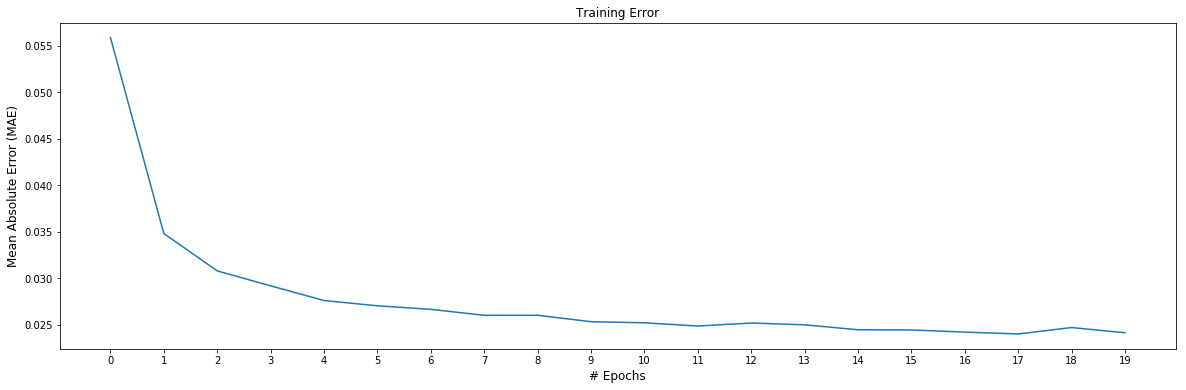

In [22]:
fig, ax1 = plt.subplots(1,1)

ax1.plot(btc_history.epoch, btc_history.history['loss'])
ax1.set_title('Training Error')

ax1.set_ylabel('Mean Absolute Error (MAE)',fontsize=12)
ax1.set_xlabel('# Epochs',fontsize=12)
ax1.set_xticks(btc_history.epoch)
plt.show()

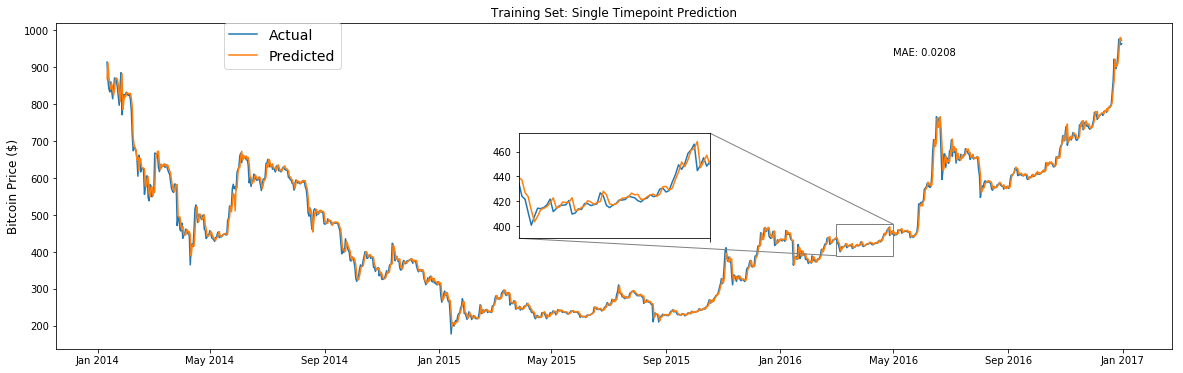

In [23]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, ax1 = plt.subplots(1,1)
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,5,9]])
ax1.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,5,9]])
ax1.plot(model_data[model_data['Date']< split_date]['Date'][window_size:].astype(datetime.datetime),
         training_set['Close'][window_size:], label='Actual')
ax1.plot(model_data[model_data['Date']< split_date]['Date'][window_size:].astype(datetime.datetime),
         ((np.transpose(btc_model.predict(LSTM_training_inputs))+1) * training_set['Close'].values[:-window_size])[0], 
         label='Predicted')
ax1.set_title('Training Set: Single Timepoint Prediction')
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.15, 1), loc=2, borderaxespad=0., prop={'size': 14})
ax1.annotate('MAE: %.4f'%np.mean(np.abs((np.transpose(btc_model.predict(LSTM_training_inputs))+1)-\
            (training_set['Close'].values[window_size:])/(training_set['Close'].values[:-window_size]))), 
             xy=(0.75, 0.9),  xycoords='axes fraction',
            xytext=(0.75, 0.9), textcoords='axes fraction')

axins = zoomed_inset_axes(ax1, 3.35, loc=10)
axins.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,5,9]])
axins.plot(model_data[model_data['Date']< split_date]['Date'][window_size:].astype(datetime.datetime),
         training_set['Close'][window_size:], label='Actual')
axins.plot(model_data[model_data['Date']< split_date]['Date'][window_size:].astype(datetime.datetime),
         ((np.transpose(btc_model.predict(LSTM_training_inputs))+1) * training_set['Close'].values[:-window_size])[0], 
         label='Predicted')
axins.set_xlim([datetime.date(2016, 3, 1), datetime.date(2016, 5, 1)])
axins.set_ylim([390,475])
axins.set_xticklabels('')
mark_inset(ax1, axins, loc1=1, loc2=3, fc="none", ec="0.5")

plt.show()

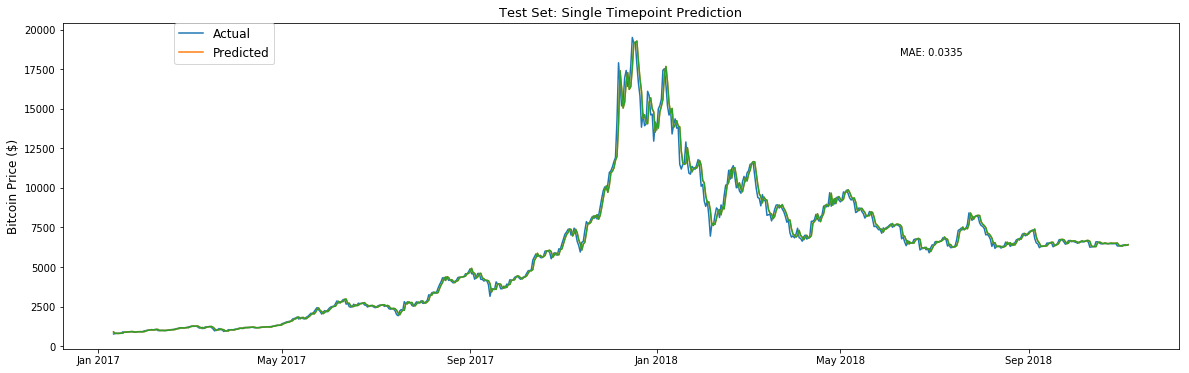

In [24]:
fig, ax1 = plt.subplots(1,1)

ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,5,9]])
ax1.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,5,9]])

ax1.plot(model_data[model_data['Date']>= split_date]['Date'][window_size:].astype(datetime.datetime),
         test_set['Close'][window_size:], label='Actual')
ax1.plot(model_data[model_data['Date']>= split_date]['Date'][window_size:].astype(datetime.datetime),
         ((np.transpose(btc_model.predict(LSTM_test_inputs))+1) * test_set['Close'].values[:-window_size])[0], 
         label='Predicted')

ax1.annotate('MAE: %.4f'%np.mean(np.abs((np.transpose(btc_model.predict(LSTM_test_inputs))+1)-\
            (test_set['Close'].values[window_size:])/(test_set['Close'].values[:-window_size]))), 
             xy=(0.75, 0.9),  xycoords='axes fraction',
            xytext=(0.75, 0.9), textcoords='axes fraction')

ax1.set_title('Test Set: Single Timepoint Prediction',fontsize=13)
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 12})

ax1.plot(model_data[model_data['Date']>= split_date]['Date'][window_size:].astype(datetime.datetime),
         ((np.transpose(btc_model.predict(LSTM_test_inputs))+1) * test_set['Close'].values[:-window_size])[0], 
         label='Predicted')
plt.show()